# 문과생 대상의 Python을 이용한 데이터 분석 강의

##### 정광윤, 2015/04/16

---

# IPython 맛보기

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


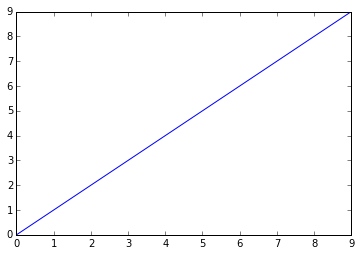

In [3]:
plot(arange(10))

---

# 실습

# 1. 영화 데이터 분석

In [80]:
import os
upath = os.path.expanduser('ch02/movielens/users.dat')
rpath = os.path.expanduser('ch02/movielens/ratings.dat')
mpath = os.path.expanduser('ch02/movielens/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames)

In [82]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [83]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [84]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## users, movies, ratings를 하나로 합쳐보자

In [86]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


## 성별에 따른 영화 평점(rating) 평균을 알아봅시다

* 구하는 값: 평점(rating)의 평균(mean)
* 컬럼: 성별(gender)
* 로우: 영화제목(title)

##### 엑셀의 피봇테이블을 생각하면 된다!

In [95]:
mean_ratings = data.pivot_table('rating', aggfunc='mean', columns='gender', rows='title')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


### 그런데 한 번 생각해봅시다. 평균의 모집단 건 수가 각기 다르다면 그게 의미가 있을까요?

## 그래서 평점을 받은 영화의 건수를 세어봅시다.

In [98]:
ratings_by_title = data.groupby('title').size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

## 250건 이상의 영화만 골라와봅시다.

In [103]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles[:10]

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)', u'101 Dalmatians (1961)', u'101 Dalmatians (1996)', u'12 Angry Men (1957)', u'13th Warrior, The (1999)', u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)', u'2001: A Space Odyssey (1968)', u'2010 (1984)'], dtype='object')

## 250건 이상의 영화만 평균을 내어봅시다.

In [135]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings.head()

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024


### 이제야 뭔가 평균에 신뢰가 생기기 시작했습니다. 그런데 말입니다..

## 만약 여러분의 여자친구가 영화를 보자고 했다면 어떻게 해야할까요?

1. 내가 보고 싶은 액션 영화를 예약한다.
2. 보고 싶지 않지만 여자들의 평점이 높은 것을 예약한다.

## 그렇죠. 여자들의 평균 평점이 높은 영화를 찾아보겠습니다.

In [106]:
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


## 난 그렇게 살기 싫다. 남녀 평균 평점에 차이가 없는 걸로 예약하겠다.

### 먼저 차이점 데이터를 엑셀 컬럼을 하나 추가 하듯, 추가해보겠습니다.

In [107]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [109]:
mean_ratings.head()

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024


### diff 기준으로 정렬시켜보겠습니다.

In [126]:
newone = mean_ratings.index[mean_ratings['diff'] <= 0]

In [130]:
mean_rating_new = mean_ratings.ix[newone]
mean_rating_new.head()

gender,F,M,diff
title,,,
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
2 Days in the Valley (1996),3.488889,3.244813,-0.244076
2010 (1984),3.446809,3.413712,-0.033097


In [133]:
mean_rating_new.sort_index(by='diff', ascending=False).head()

gender,F,M,diff
title,,,
Tender Mercies (1983),3.905405,3.905263,-0.000142
Running Scared (1986),3.384615,3.381818,-0.002797
Batman Returns (1992),2.980100,2.975904,-0.004196
Roger & Me (1989),4.077778,4.072816,-0.004962
Do the Right Thing (1989),3.885714,3.879538,-0.006176


---

# 2. Finance 분석하기

## 애플 주식 알아보기 from yahoo finance

In [1]:
from pandas import DataFrame, Series
import pandas.io.data as web
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
all_data = {}
for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']:
    all_data[ticker] = web.get_data_yahoo(ticker)
    
all_data['GOOG'].tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-08,538.38,543.85,538.38,541.61,1170400,541.61
2015-04-09,541.03,541.95,535.49,540.78,1549700,540.78
2015-04-10,542.29,542.29,537.31,540.01,1400800,540.01
2015-04-13,538.41,544.06,537.31,539.17,1628900,539.17
2015-04-14,536.25,537.57,528.09,530.39,2590200,530.39


In [13]:
all_data['AAPL']['Adj Close'].tail()

Date
2015-04-08    125.60
2015-04-09    126.56
2015-04-10    127.10
2015-04-13    126.85
2015-04-14    126.30
Name: Adj Close, dtype: float64

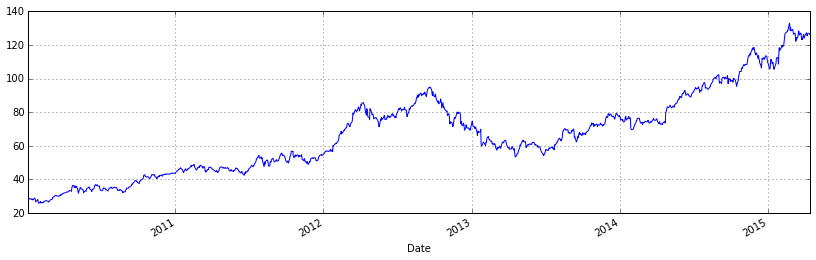

In [11]:
all_data['AAPL']['Adj Close'].plot(figsize=(14,4))

---

## 변화율 계산하기 

In [17]:
price = DataFrame({tic: data['Adj Close'] for tic, data in all_data.iteritems()})
price.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2015-04-08,125.60,541.61,161.85,41.42
2015-04-09,126.56,540.78,162.34,41.48
2015-04-10,127.10,540.01,162.86,41.72
2015-04-13,126.85,539.17,162.38,41.76
2015-04-14,126.30,530.39,162.30,41.65


In [18]:
price_percent_change = price.pct_change()
price_percent_change.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2015-04-08,-0.003254,0.008547,-0.001357,-0.002649
2015-04-09,0.007643,-0.001532,0.003027,0.001449
2015-04-10,0.004267,-0.001424,0.003203,0.005786
2015-04-13,-0.001967,-0.001556,-0.002947,0.000959
2015-04-14,-0.004336,-0.016284,-0.000493,-0.002634


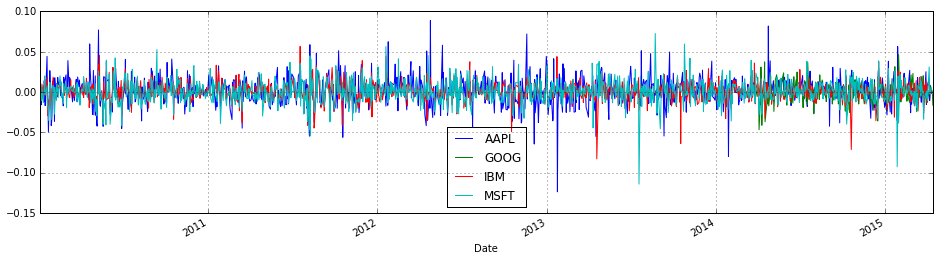

In [22]:
price_percent_change.plot(figsize=(16,4))

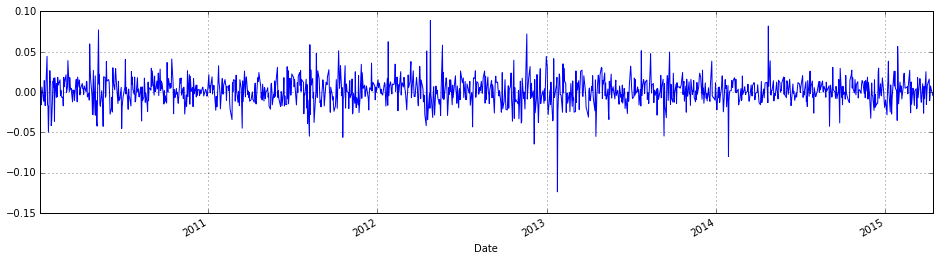

In [28]:
price_percent_change['AAPL'].plot(figsize=(16,4))

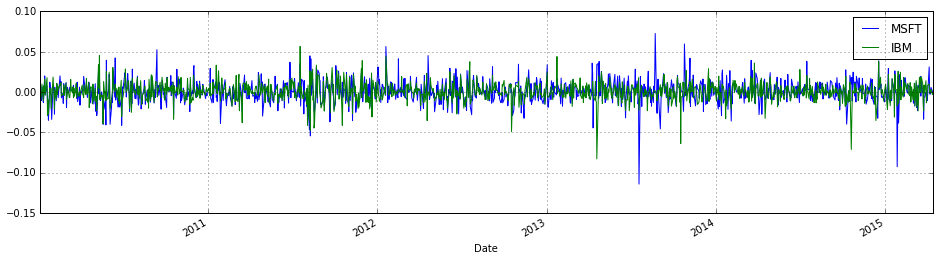

In [26]:
price_percent_change[['MSFT', 'IBM']].plot(figsize=(16,4))

## 상관관계 분석하기

In [31]:
price_percent_change.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.271646,0.371905,0.347908
GOOG,0.271646,1.000000,0.311763,0.414120
IBM,0.371905,0.311763,1.000000,0.501069
MSFT,0.347908,0.414120,0.501069,1.000000


## 주가 변화율과 시가 총액과의 상관관계 분석하기

In [32]:
volume = DataFrame({tic: data['Volume'] for tic, data in all_data.iteritems()})

In [34]:
volume.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2015-04-08,37193100,1170400,2514500,24603400
2015-04-09,32104700,1549700,2256900,25664100
2015-04-10,40047500,1400800,2511000,27852100
2015-04-13,35964400,1628900,3820600,29529700
2015-04-14,25325100,2590200,2716200,24078000


In [37]:
price_percent_change.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2015-04-08,-0.003254,0.008547,-0.001357,-0.002649
2015-04-09,0.007643,-0.001532,0.003027,0.001449
2015-04-10,0.004267,-0.001424,0.003203,0.005786
2015-04-13,-0.001967,-0.001556,-0.002947,0.000959
2015-04-14,-0.004336,-0.016284,-0.000493,-0.002634


In [36]:
price_percent_change.corrwith(volume)

AAPL   -0.097492
GOOG   -0.085920
IBM    -0.184701
MSFT   -0.119976
dtype: float64